In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
# Veri setini yükle
df = pd.read_csv("Admission_Predict.csv")

# İlk 5 satırı görüntüle
print(df.head())

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


In [4]:
# Eksik değer kontrolü
print(df.isnull().sum())
# Eksik verileri içeren satırları kaldır (eğer varsa)
df = df.dropna()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [5]:
# Hedef değişkeni dönüştürülüyor
df['Admit'] = (df['Chance of Admit '] >= 0.75).astype(int)
# Kontrol edelim
print(df[['Chance of Admit ', 'Admit']].head())

   Chance of Admit   Admit
0              0.92      1
1              0.76      1
2              0.72      0
3              0.80      1
4              0.65      0


In [6]:
# Bağımsız değişkenler
X = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]
# Hedef değişken
y = df['Admit']

In [7]:
# Veriyi eğitim ve test setine bölelim (%80 eğitim, %20 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Boyutları kontrol edelim
print("Eğitim verisi boyutu:", X_train.shape)
print("Test verisi boyutu:", X_test.shape)

Eğitim verisi boyutu: (320, 7)
Test verisi boyutu: (80, 7)


In [8]:
# StandardScaler nesnesini oluştur
scaler = StandardScaler()
# Sadece bağımsız değişkenleri (X_train ve X_test) ölçeklendireceğiz
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Model nesnesini oluştur
model = LogisticRegression()

In [10]:
# Modeli eğit (ölçeklenmiş eğitim verisiyle)
model.fit(X_train_scaled, y_train)
# Modeli tekrar eğitim verisi üzerinde eğitelim
model.fit(X_train_scaled, y_train)

print("Model eğitim tamamlandı.")

Model eğitim tamamlandı.


In [11]:
# Test verisi üzerinde tahmin yap
y_pred = model.predict(X_test_scaled)

# İlk 10 tahmini görelim
print(y_pred[:10])


[0 1 1 1 0 1 0 0 0 1]


In [12]:
# Model tahminlerini yap (örneğin test verisi X_test üzerinde)
y_pred = model.predict(X_test)

# Gerçek ve tahmin edilen değerleri kullanarak doğruluk oranını hesapla
accuracy = accuracy_score(y_test, y_pred)

print(f"Modelin doğruluk oranı: {accuracy:.4f}")

Modelin doğruluk oranı: 0.4125


c:\Users\ceren\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


c:\Users\ceren\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


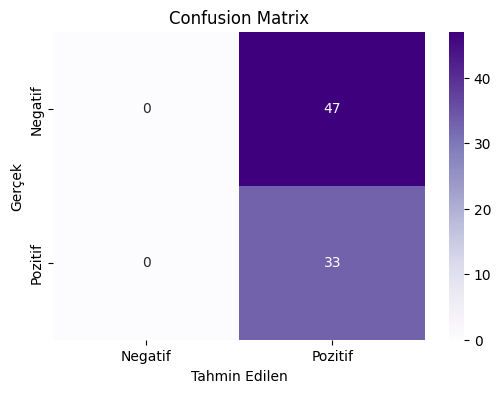

In [19]:
# Tahminleri alalım
y_pred = model.predict(X_test)

# Confusion matrix'i hesapla
cm = confusion_matrix(y_test, y_pred)

# Matrisi görselleştir
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['Negatif', 'Pozitif'], yticklabels=['Negatif', 'Pozitif'])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Confusion Matrix')
plt.show()

In [13]:
# Modelin tahminlerini alalım (y_pred zaten varsa)
print(classification_report(y_test, y_pred, target_names=['Negatif', 'Pozitif']))


              precision    recall  f1-score   support

     Negatif       0.00      0.00      0.00        47
     Pozitif       0.41      1.00      0.58        33

    accuracy                           0.41        80
   macro avg       0.21      0.50      0.29        80
weighted avg       0.17      0.41      0.24        80



c:\Users\ceren\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ceren\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ceren\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [14]:
# Modelin tahmin ettiği olasılıkları alıyoruz (pozitif sınıf için)
y_prob = model.predict_proba(X_test)[:, 1]

# Gerçek değerlerle ve olasılıklarla bir DataFrame oluşturalım
import pandas as pd

results = pd.DataFrame({
    'Gerçek Değer': y_test,
    'Tahmin Edilen Olasılık': y_prob
})

# İlk 10 satırı gösterelim
print(results.head(10))


     Gerçek Değer  Tahmin Edilen Olasılık
209             0                     1.0
280             0                     1.0
33              1                     1.0
210             1                     1.0
93              0                     1.0
84              1                     1.0
329             0                     1.0
94              0                     1.0
266             0                     1.0
126             1                     1.0


c:\Users\ceren\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [17]:
import numpy as np

# Örnek veri
X = np.array([[1], [2], [3], [4]])
y = np.array([0, 0, 1, 1])

# Sigmoid fonksiyonu
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Başlangıç
w = np.array([0.0])  # Tek elemanlı array
b = 0.0
lr = 0.1
epochs = 10

for i in range(epochs):
    z = np.dot(X, w) + b
    y_pred = sigmoid(z)

    dw = np.dot(X.T, (y_pred - y)) / len(y)
    db = np.sum(y_pred - y) / len(y)

    w -= lr * dw.T  # w'nin şekli (1, 1) olabilir, transpoz ile uyumlu hale getiriyoruz
    b -= lr * db

    # Çıktı yazdırırken float formatına çeviriyoruz
    print(f"Epoch {i+1}: w = {float(w[0]):.4f}, b = {b:.4f}")


Epoch 1: w = 0.0500, b = 0.0000
Epoch 2: w = 0.0906, b = -0.0031
Epoch 3: w = 0.1240, b = -0.0087
Epoch 4: w = 0.1516, b = -0.0161
Epoch 5: w = 0.1747, b = -0.0250
Epoch 6: w = 0.1944, b = -0.0351
Epoch 7: w = 0.2112, b = -0.0460
Epoch 8: w = 0.2259, b = -0.0577
Epoch 9: w = 0.2387, b = -0.0699
Epoch 10: w = 0.2502, b = -0.0826


In [19]:
import numpy as np

# Sigmoid ve Loss fonksiyonu
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def binary_cross_entropy(y_true, y_pred):
    epsilon = 1e-10  # log(0)'ı engellemek için
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Veri
X = np.array([[1], [2], [3], [4]])
y = np.array([0, 0, 1, 1])

# Başlangıç değerleri
w = np.array([0.0])
b = 0.0
lr = 0.1
epochs = 100
tol = 1e-4  # Erken durma toleransı

prev_loss = float('inf')

for epoch in range(epochs):
    z = np.dot(X, w) + b
    y_pred = sigmoid(z)
    
    loss = binary_cross_entropy(y, y_pred)

    # Gradients
    dw = np.dot(X.T, (y_pred - y)) / len(y)
    db = np.sum(y_pred - y) / len(y)

    # Güncelleme
    w -= lr * dw.T
    b -= lr * db

    # Loss değişimini kontrol et
    loss_change = abs(prev_loss - loss)
    print(f"Epoch {epoch+1}: loss = {loss:.6f}, change = {loss_change:.6f}")

    if loss_change < tol:
        print(f" Eğitim durdu (Epoch {epoch+1}) çünkü loss değişimi {loss_change:.6f} < tol ({tol})")
        break

    prev_loss = loss


Epoch 1: loss = 0.693147, change = inf
Epoch 2: loss = 0.670488, change = 0.022659
Epoch 3: loss = 0.655322, change = 0.015167
Epoch 4: loss = 0.644806, change = 0.010515
Epoch 5: loss = 0.637188, change = 0.007618
Epoch 6: loss = 0.631391, change = 0.005797
Epoch 7: loss = 0.626752, change = 0.004639
Epoch 8: loss = 0.622860, change = 0.003893
Epoch 9: loss = 0.619454, change = 0.003405
Epoch 10: loss = 0.616372, change = 0.003083
Epoch 11: loss = 0.613507, change = 0.002865
Epoch 12: loss = 0.610790, change = 0.002716
Epoch 13: loss = 0.608179, change = 0.002612
Epoch 14: loss = 0.605642, change = 0.002537
Epoch 15: loss = 0.603161, change = 0.002481
Epoch 16: loss = 0.600723, change = 0.002438
Epoch 17: loss = 0.598319, change = 0.002404
Epoch 18: loss = 0.595943, change = 0.002376
Epoch 19: loss = 0.593592, change = 0.002351
Epoch 20: loss = 0.591263, change = 0.002330
Epoch 21: loss = 0.588953, change = 0.002310
Epoch 22: loss = 0.586661, change = 0.002291
Epoch 23: loss = 0.58438

In [21]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Veri setini oku
df = pd.read_csv("admission_predict.csv")

# Giriş ve hedef değişkenleri ayır
X = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ']]
y = df['Chance of Admit ']

# Özellikleri ölçeklendir (isteğe bağlı ama önemli)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Modeli eğit
model = LinearRegression()
model.fit(X_scaled, y)

# Ağırlıkları al
feature_names = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR']
weights = model.coef_

# Önem sırasına göre sırala
importance = sorted(zip(feature_names, weights), key=lambda x: abs(x[1]), reverse=True)

# Yazdır
for name, weight in importance:
    print(f"{name}: {weight:.3f}")


GRE Score: 0.052
TOEFL Score: 0.036
LOR: 0.030
University Rating: 0.017
SOP: 0.006


In [22]:
# 1. Veri yükle
df = pd.read_csv("admission_predict.csv")

# 2. Giriş ve hedef değişkenleri ayır
X = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ']]
y = df['Chance of Admit ']

# 3. Eğitim-test ayırımı
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Özellikleri ölçeklendir
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Modeli eğit
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 6. Tahmin yap
y_pred = model.predict(X_test_scaled)

# 7. Alternatif eşiklerle sınıflandırma
for threshold in [0.5, 0.7, 0.8]:
    y_pred_class = (y_pred >= threshold).astype(int)
    y_true_class = (y_test >= threshold).astype(int)
    acc = accuracy_score(y_true_class, y_pred_class)
    print(f"Eşik = {threshold} → Doğruluk: {acc:.3f}")


Eşik = 0.5 → Doğruluk: 0.912
Eşik = 0.7 → Doğruluk: 0.912
Eşik = 0.8 → Doğruluk: 0.925


In [24]:
'''
Bu veri seti oldukça sınırlı. 
Gerçek başvuru verileri ya da benzer kaynaklardan alınan ek verilerle modelin genelleme gücü artabilir.
'''

'\nBu veri seti oldukça sınırlı. \nGerçek başvuru verileri ya da benzer kaynaklardan alınan ek verilerle modelin genelleme gücü artabilir.\n'

In [27]:
'''
Sadece doğruluk değil, R² skoru, RMSE, MAE gibi regresyon metrikleriyle performans ölçülebilir.

'''

'\nSadece doğruluk değil, R² skoru, RMSE, MAE gibi regresyon metrikleriyle performans ölçülebilir.\n\n'